In [35]:
#Importing required packages
import tweepy
from tweepy.streaming import StreamListener
import json
import pandas as pd
from textblob import TextBlob
import seaborn as sns

In [7]:
#Secret keys to access tweets using twitter API
cKey = 'FuTiq3HBtmwaYTpmnxcJsRTFE'
cSecret ='HLUo1KKF05i396UXSw81xlpkJJyxbKrY3o0Y8cYE4GcGJMpYlS'
aToken = '99239077-FLd7whicYSaOhfiD96IvGcIpcCNIEafgPNj4phQ8P'
aSecret ='nVIVklWEmn8LPinyUc7ymeUKHjVDlwSKm7FHIS3PAxuBb'

auth = tweepy.OAuthHandler(cKey,cSecret)
auth.set_access_token(aToken,aSecret)
api = tweepy.API(auth)

In [8]:
#Function to extracte tweets for a given screen name in list:
def tweetlist(twitterscreenname):
    tlist = []
    for status in tweepy.Cursor(api.user_timeline, screen_name=twitterscreenname).items():
        tlist.append(status._json['text'])
    return tlist
    

In [67]:
#Extracting tweets for top 4 news channels in India
NLtweets = tweetlist('@newslaundry')
SWtweets=  tweetlist('@SwarajyaMag')
Reptweets =  tweetlist('@republic')
NDTVtweets =  tweetlist('@ndtv')
ZeeTVtweets = tweetlist('@ndtv')

In [70]:
#Consolidating the tweets from allthe 4 news channels in a dataframe:
MinRow = min(len(NLtweets),len(SWtweets),len(Reptweets),len(NDTVtweets),len(ZeeTVtweets))
twitter_df = pd.DataFrame()
twitter_df['NewsLaundry']=NLtweets[0:MinRow]
twitter_df['Swarajya']=SWtweets[0:MinRow]
twitter_df['Republic']=Reptweets[0:MinRow]
twitter_df['NDTV']=NDTVtweets[0:MinRow]
twitter_df['ZeeTV']=ZeeTVtweets[0:MinRow]
twitter_df.head()

,NewsLaundry,Swarajya,Republic,NDTV,ZeeTV
0,#NLCheatsheet | @Memeghnad explains the convol...,"Go Watch ‘Padman’, And Watch It With Your Sons...",WhatsApp vs Paytm: It's on!\nhttps://t.co/0o0f...,"What is LoU? Punjab National Bank's Rs 11,300-...","What is LoU? Punjab National Bank's Rs 11,300-..."
1,#NLHafta has gone behind the paywall. Here's a...,"Aravindan Neelakandan watched ‘Padman’, and no...",#KanganaRanaut's latest move could spell more ...,"Florida shooting suspect visited McDonald's, S...","Florida shooting suspect visited McDonald's, S..."
2,#NLHafta: Where @AartiTikoo asks @ARanganatha...,The multi-modal logistics hub is set to play a...,#ArrestNiravModi | REVEALED: The Alpha Files o...,"Video: Train just a minute away, child falls o...","Video: Train just a minute away, child falls o..."
3,#CampusPolitik| Is violence becoming the new n...,Udvada station in the Valsad district of Gujar...,#BiggBoss11 winner #ShilpaShinde just broke th...,US court says Trump travel ban unlawfully disc...,US court says Trump travel ban unlawfully disc...
4,"#CampusPolitik| “More than academics, my profe...",Don't forget to check out our Weekend Edition:...,#ArrestNiravModi | REVEALED: The Alpha Files o...,Samsung hints at new camera features for Galax...,Samsung hints at new camera features for Galax...


In [71]:
def analysetweets(colName,ChannelKey):
    for i, row in twitter_df.T.iteritems():
        if wordToSearch in row[colName].upper():
            analysis = TextBlob(row[colName])
            row[(str(colName)+'pol')] = analysis.sentiment.polarity
            polaritycount(ChannelKey,row[(str(colName)+'pol')])

In [72]:
#Function to count the positive, negative and neutral tweets on a given topic
def polaritycount(channelkey,polarity):
    if polarity >0:
        dictpolcount[channelkey][0] +=1
    elif polarity <0:
        dictpolcount[channelkey][1]+= +1
    else:
        dictpolcount[channelkey][2]+= +1 

In [104]:
#Estimatingthe polarity of tweets using the TextBlob package:
wordToSearch = 'TRUM'



sentimentlist = [0,0,0,0,0]
tweetcol = [c for c in twitter_df if 'Senti' not in c]
dictpolcount ={}

for col in tweetcol:
    dictpolcount[col] = sentimentlist.copy()


for i in range(len(tweetcol)):
    analysetweets(tweetcol[i],list(dictpolcount.keys())[i])

for key, value in dictpolcount.items():
    if (value[0]+value[1]+value[2])>0:        
        value[3] = value[0]+value[1]+value[2]
        value[0]= value[0]/value[3]
        value[1]= value[1]/value[3]
        value[2] = value[2]/value[3]

dictpolcount


   

{'NDTV': [0.09090909090909091, 0.21212121212121213, 0.696969696969697, 66, 0],
 'NewsLaundry': [0.3103448275862069,
  0.1724137931034483,
  0.5172413793103449,
  29,
  0],
 'Republic': [0.38095238095238093,
  0.047619047619047616,
  0.5714285714285714,
  21,
  0],
 'Swarajya': [0.32432432432432434, 0.17567567567567569, 0.5, 74, 0],
 'ZeeTV': [0.09090909090909091, 0.21212121212121213, 0.696969696969697, 66, 0]}

In [105]:
df_analysis = pd.DataFrame(dictpolcount)
df_analysis.index = ['Positive','Negative','Neutral','Total','Positive%']

In [106]:
df_analysis

,NDTV,NewsLaundry,Republic,Swarajya,ZeeTV
Positive,0.090909,0.310345,0.380952,0.324324,0.090909
Negative,0.212121,0.172414,0.047619,0.175676,0.212121
Neutral,0.696970,0.517241,0.571429,0.500000,0.696970
Total,66.000000,29.000000,21.000000,74.000000,66.000000
Positive%,0.000000,0.000000,0.000000,0.000000,0.000000


In [107]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


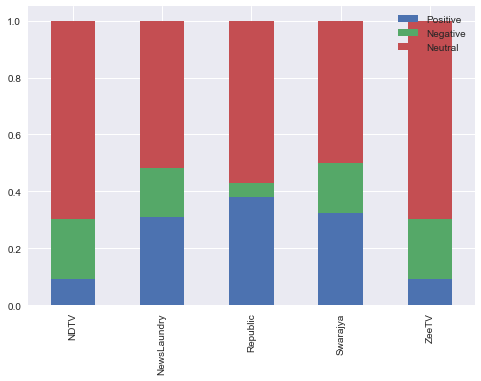

In [108]:
sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#ax = sns.barplot(x=df_analysis.index, y="NDTV", data=df_analysis)

sns.set()
df_analysis[(df_analysis.index!='Total') & (df_analysis.index!='Positive%')].T.plot(kind='bar', stacked=True)

In [109]:
(df_analysis.index!='Total') & (df_analysis.index !='Positive%')

array([ True,  True,  True, False, False], dtype=bool)